In [1]:
import pandas as pd   #importing necessary libraries
import numpy as np

In [2]:
dataframe = pd.read_csv('D:\Summer 2022\Datascience Projects UDEMY\Project3/BAJFINANCE.csv') #reading our CSV files 
dataframe.head() #The VWAP is what is dependent on factors such as High, Low, Volume, Turnover, Trades

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [38]:
dataframe.set_index('Date',inplace=True)

<AxesSubplot:xlabel='Date'>

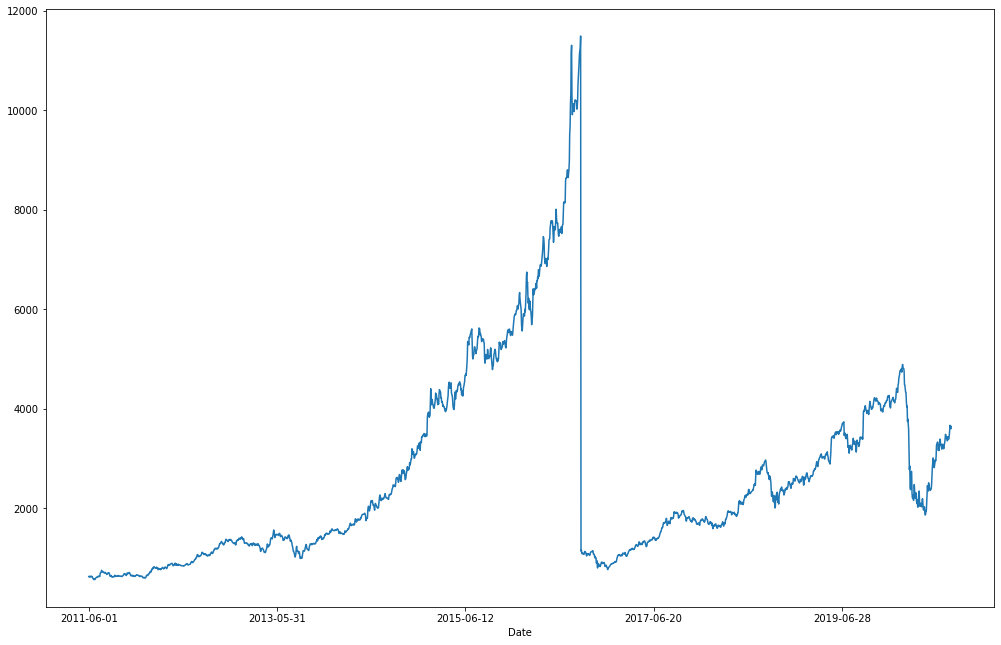

In [40]:
dataframe['VWAP'].plot(figsize=(17,11)) 

In [4]:
dataframe.shape  #the no.of rows and columns

(5070, 15)

In [5]:
dataframe.isna().sum() #checking for the null values in the dataframe

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [6]:
dataframe.dropna(inplace=True) #deleting rows containing null values
dataframe.isna().sum() #now re checking will give no null rows

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [7]:
dataframe.shape #our no.of rows got reduced

(2291, 15)

In [8]:
df = dataframe.copy() #copying the dataframe into another one

In [9]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [10]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [11]:
lagfeatures = ['High','Low','Volume','Turnover','Trades'] #These are the independent features I have mentioned above 
window1=3
window2=7

In [13]:
for feature in lagfeatures:  # For loops for calucating the moving averages by using rolling concept
    df[feature+'rolling_mean_3']=df[feature].rolling(window=window1).mean() 
    df[feature+'rolling_mean_7']=df[feature].rolling(window=window2).mean()
    

In [14]:
for feature in lagfeatures:
    df[feature+'rolling_std_3']=df[feature].rolling(window=window1).std()
    df[feature+'rolling_std_7']=df[feature].rolling(window=window2).std()
    

In [15]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
2779,2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2780,2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2781,2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,...,1.201388,NaN,2.309401,NaN,26980.871860,NaN,1.685217e+12,NaN,670.500559,NaN
2782,2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,...,1.625833,NaN,4.994080,NaN,27352.695339,NaN,1.710136e+12,NaN,148.769396,NaN
2783,2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,...,9.062422,NaN,8.008797,NaN,26391.221653,NaN,1.652377e+12,NaN,78.270897,NaN


In [17]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [18]:
df.shape 

(2291, 35)

In [19]:
df.isna().sum() #re checking for null values in this df dataframe

Date                      0
Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [20]:
df.dropna(inplace=True) #Dropping those


In [22]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [23]:
indfeatures = ['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']  #Taken important parameters necessary in predicting the model

In [24]:
trainingdata = df[0:1900] # Choosen more data points for training to get a high accuracy
testdata = df[1900:]
trainingdata #checking for the values

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
2785,2011-06-09,BAJFINANCE,EQ,635.60,639.80,647.00,630.00,630.00,631.10,638.27,...,12.769789,7.494911,15.011107,9.410145,1.349705e+04,1.837389e+04,8.665128e+11,1.155773e+12,354.841279,463.942320
2786,2011-06-10,BAJFINANCE,EQ,631.10,641.85,648.25,618.55,621.10,622.20,634.16,...,1.639360,8.227994,13.030765,9.501961,2.434971e+03,1.804733e+04,1.579562e+11,1.136003e+12,272.875429,448.020620
2787,2011-06-13,BAJFINANCE,EQ,622.20,616.00,627.85,616.00,622.75,624.95,622.92,...,11.434196,9.497080,7.456597,9.298317,1.564005e+04,1.783564e+04,9.982094e+11,1.123423e+12,557.373603,464.778596
2788,2011-06-14,BAJFINANCE,EQ,624.95,625.00,628.95,619.95,621.20,622.10,625.35,...,11.473593,10.198891,2.002707,9.293713,1.508818e+04,1.313947e+04,9.595224e+11,8.397765e+11,656.385050,455.234163
2789,2011-06-15,BAJFINANCE,EQ,622.10,612.00,623.00,598.10,605.00,601.70,606.90,...,3.165833,11.352292,11.643560,11.262712,4.575813e+03,1.246914e+04,2.733211e+11,7.983186e+11,150.639747,436.941971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,2019-01-31,BAJFINANCE,EQ,2595.50,2608.00,2608.00,2526.00,2581.10,2574.85,2567.54,...,27.555580,32.709093,95.413001,107.316761,2.021753e+06,1.957781e+06,4.889767e+14,4.837465e+14,65526.572595,78279.359316
4681,2019-02-01,BAJFINANCE,EQ,2574.85,2575.00,2687.90,2575.00,2629.00,2628.40,2630.85,...,42.332297,39.528133,24.637370,102.652820,1.027316e+06,1.862602e+06,2.656886e+14,4.596597e+14,47723.681208,73003.630551
4682,2019-02-04,BAJFINANCE,EQ,2628.40,2610.00,2623.55,2572.20,2594.30,2594.45,2593.98,...,42.361018,38.236085,27.517510,98.503470,6.690692e+05,1.832537e+06,1.745154e+14,4.521321e+14,32453.453165,71342.100696
4683,2019-02-05,BAJFINANCE,EQ,2594.45,2600.00,2642.10,2593.95,2600.00,2603.60,2621.69,...,33.122663,35.979900,11.832195,99.773805,6.598264e+05,1.818180e+06,1.749285e+14,4.484307e+14,27260.709094,71113.540018


In [25]:
!pip install pmdarima #installed for ARIMA model

     -------------------------------------- 601.9/601.9 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 9.1/9.1 MB 5.0 MB/s eta 0:00:00
     -------------------------------------- 985.1/985.1 kB 4.8 MB/s eta 0:00:00
     -------------------------------------- 233.7/233.7 kB 4.9 MB/s eta 0:00:00


In [26]:
from pmdarima import auto_arima 

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
model = auto_arima(y=trainingdata['VWAP'],exogenous=trainingdata[indfeatures],trace=True) #Preparing the model for our VWAP as dependent and indfeatures are independent features
model.fit(trainingdata['VWAP'],trainingdata[indfeatures])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=22031.535, Time=2.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=22025.998, Time=1.54 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=22027.574, Time=1.57 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=22027.562, Time=1.63 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=34470.095, Time=1.35 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=22030.015, Time=1.98 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 10.152 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [29]:
forecast = model.predict(n_periods=len(testdata),exogenous=testdata[indfeatures]) #prediction for the test data
testdata['FORECAST ARIMA'] = forecast #Preparing another column for FORECAST ARIMA. which is the prediction

<AxesSubplot:>

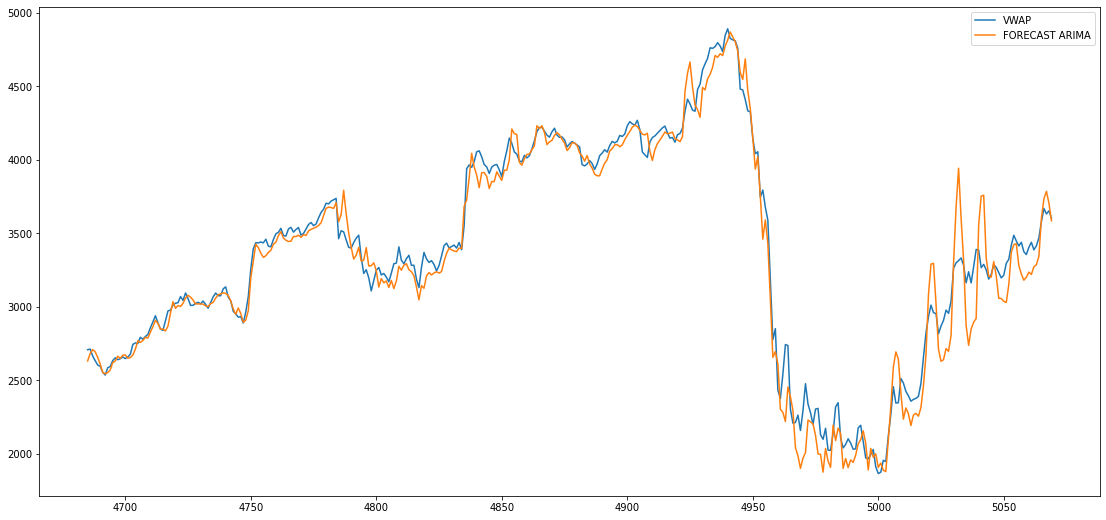

In [34]:
testdata[['VWAP','FORECAST ARIMA']].plot(figsize=(19,9)) #PLOTTED

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
np.sqrt(mean_squared_error(testdata['VWAP'],testdata['FORECAST ARIMA'])) #Checking RMS error


133.00076488738927

In [37]:
mean_absolute_error(testdata['VWAP'],testdata['FORECAST ARIMA']) #Checking absolute error

92.16429567688554